#### Problem Statement:

To predict the stock price of Apple for the year 2021.

#### Import Libraries:

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error

#### Loading Data:

In [2]:
data=pd.read_excel("D:/MTech-DSML/DATA/RNN-Apple_Main.xlsx",parse_dates=['Date'])
data.set_index(['Date'],inplace=True)

In [3]:
data.shape

(1600, 5)

In [4]:
# Top 5
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02 00:00:00,27.85,27.86,26.84,27.33,53204626
2015-01-05 16:00:00,27.07,27.16,26.35,26.56,64285491
2015-01-06 16:00:00,26.64,26.86,26.16,26.57,65797116
2015-01-07 16:00:00,26.80,27.05,26.67,26.94,40105934
2015-01-08 16:00:00,27.31,28.04,27.18,27.97,59364547


In [5]:
# Last 5
data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-05-05 16:00:00,129.20,130.45,127.97,128.10,84000900
2021-05-06 16:00:00,127.89,129.75,127.13,129.74,78128334
2021-05-07 16:00:00,130.85,131.26,129.48,130.21,78973273
2021-05-10 16:00:00,129.41,129.54,126.81,126.85,88071229
2021-05-11 16:00:00,123.50,126.27,122.77,125.91,126142826


In [6]:
# Splitting Data into train & test
train_end=datetime(2021,3,31)
test_end=datetime(2021,5,11)
train_data = data[:train_end] 
test_data  = data[train_end + timedelta(days=1):test_end]
print("Train shape:",train_data.shape)
print("Test shape:",test_data.shape)

Train shape: (1571, 5)
Test shape: (27, 5)


#### Feature Scaling:

In [7]:
train=train_data.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
train_scaled = sc.fit_transform(train)

#### Creating a data structure with 60 timesteps and 1 output :

In [8]:
X_train = []
y_train = []
for i in range(60, 1571):
    X_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

#### Reshape:

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

#### Building RNN Model:

In [10]:
# Initialising RNN
regressor = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units = 1))

#### Compile the model :

In [11]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

#### Fitting the RNN to the Training set:

In [12]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
48/48 [==============================] - 20s 55ms/step - loss: 0.0255
Epoch 2/100
48/48 [==============================] - 3s 55ms/step - loss: 0.0021
Epoch 3/100
48/48 [==============================] - 3s 56ms/step - loss: 0.0020
Epoch 4/100
48/48 [==============================] - 3s 58ms/step - loss: 0.0022
Epoch 5/100
48/48 [==============================] - 3s 58ms/step - loss: 0.0023
Epoch 6/100
48/48 [==============================] - 3s 58ms/step - loss: 0.0019
Epoch 7/100
48/48 [==============================] - 3s 57ms/step - loss: 0.0019
Epoch 8/100
48/48 [==============================] - 3s 58ms/step - loss: 0.0021
Epoch 9/100
48/48 [==============================] - 3s 58ms/step - loss: 0.0027
Epoch 10/100
48/48 [==============================] - 3s 58ms/step - loss: 0.0017
Epoch 11/100
48/48 [==============================] - 3s 59ms/step - loss: 0.0023
Epoch 12/100
48/48 [==============================] - 3s 58ms/step - loss: 0.0015
Epoch 13/100
48/48 [====

48/48 [==============================] - 3s 56ms/step - loss: 7.2853e-04
Epoch 99/100
48/48 [==============================] - 3s 56ms/step - loss: 6.3186e-04
Epoch 100/100
48/48 [==============================] - 3s 56ms/step - loss: 6.1937e-04


#### The real stock price:

In [13]:
real_stock_price =test_data.iloc[:, 1:2].values

#### The predicted stock price:

In [14]:
dataset_total = pd.concat((train_data['Open'],test_data['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 87):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#### Visualising the results:

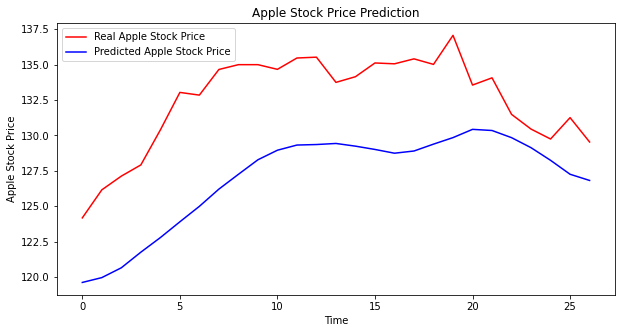

In [17]:
plt.figure(figsize=(10,5))
plt.plot(real_stock_price, color = 'red', label = 'Real Apple Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [24]:
rmse=mean_squared_error(real_stock_price,predicted_stock_price,squared=False)
print("Mse of test data",mse)

Mse of test data 5.858343132998935


#### Conclusion:

- The rmse obtained on test data is 5.8 which is a good score.
- The mdoel built gives a very low loss.
- As per the results plotted, the predicted values are pretty close to the actual value of the stock price.